In [19]:
pip install vMFD

  Obtaining dependency information for vMFD from https://files.pythonhosted.org/packages/31/09/eae6dfdde53f3323805249d47c3f893de46b96848eb9a2acab9d67485030/vMFD-0.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [20]:
import vMFD
vMFD.download_data("word_moral_appeals_googlenews")

2024-09-03 09:15:40,139@vMFD:INFO: Downloading: https://raw.githubusercontent.com/ZeningDuan/vMFD/main/vMFD/data/word_moral_googlenews.csv.gz
2024-09-03 09:15:47,051@vMFD:INFO: Data downloaded!


In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import vMFD

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize vMFD
vo = vMFD.vMFD()

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Define a text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Retain only alphanumeric tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Define file paths
input_csv_path = 'HMGCnews.csv'  # Path to the input CSV file
output_csv_path = 'HMGCnews_with_strength.csv'  # Path to the output CSV file

# Load CSV file into DataFrame
df = pd.read_csv(input_csv_path)

# Preprocess the 'article' column
df['preprocessed_article'] = df['article'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else [])

# Calculate moral strength using vMFD
df['strength'] = df['preprocessed_article'].apply(lambda tokens: vo.calculate_strength(' '.join(tokens)) if tokens else None)

# Expand 'strength' dictionary into separate columns
strength_df = df['strength'].apply(pd.Series)

# Merge results
final_df = pd.concat([df.drop('strength', axis=1), strength_df], axis=1)

# Output results to a new CSV file
final_df.to_csv(output_csv_path, index=False)

print(f"Analysis complete. Results saved to {output_csv_path}")


[nltk_data] Downloading package punkt to /Users/wangzilu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangzilu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-04 04:33:20,872@vMFD:INFO: Loading /Users/wangzilu/anaconda3/lib/python3.11/site-packages/vMFD/data/word_moral_googlenews.csv.gz
2024-09-04 04:33:23,650@vMFD:INFO: Converting data frame to dict


分析完成，结果已保存到 HMGCnews_with_strength.csv


In [57]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import vMFD

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize vMFD
vo = vMFD.vMFD()

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Define a text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Retain only alphanumeric tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Define file paths
input_csv_path = 'AIGCnews.csv'  # Path to the input CSV file
output_csv_path = 'AIGCnews_with_strength.csv'  # Path to the output CSV file

# Load CSV file into DataFrame
df = pd.read_csv(input_csv_path)

# Preprocess the 'article' column
df['preprocessed_article'] = df['article'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else [])

# Calculate moral strength using vMFD
df['strength'] = df['preprocessed_article'].apply(lambda tokens: vo.calculate_strength(' '.join(tokens)) if tokens else None)

# Expand 'strength' dictionary into separate columns
strength_df = df['strength'].apply(pd.Series)

# Merge results
final_df = pd.concat([df.drop('strength', axis=1), strength_df], axis=1)

# Output results to a new CSV file
final_df.to_csv(output_csv_path, index=False)

print(f"Analysis complete. Results saved to {output_csv_path}")


[nltk_data] Downloading package punkt to /Users/wangzilu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangzilu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-04 04:30:07,685@vMFD:INFO: Loading /Users/wangzilu/anaconda3/lib/python3.11/site-packages/vMFD/data/word_moral_googlenews.csv.gz
2024-09-04 04:30:09,770@vMFD:INFO: Converting data frame to dict


分析完成，结果已保存到 AIGCnews_with_strength.csv


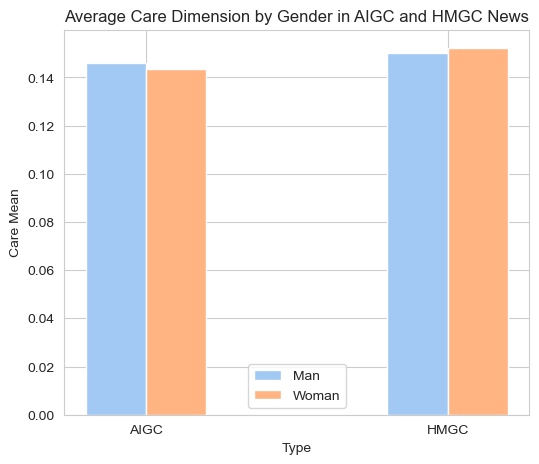

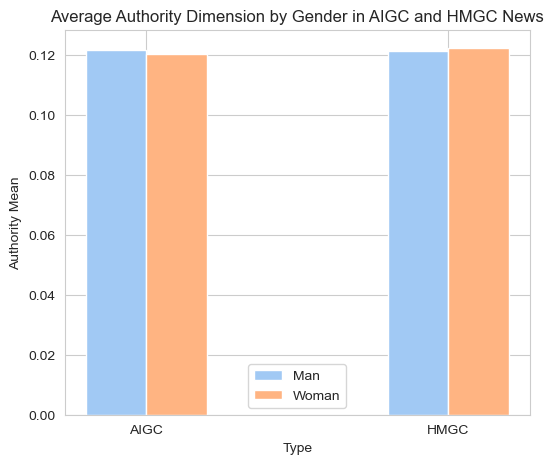

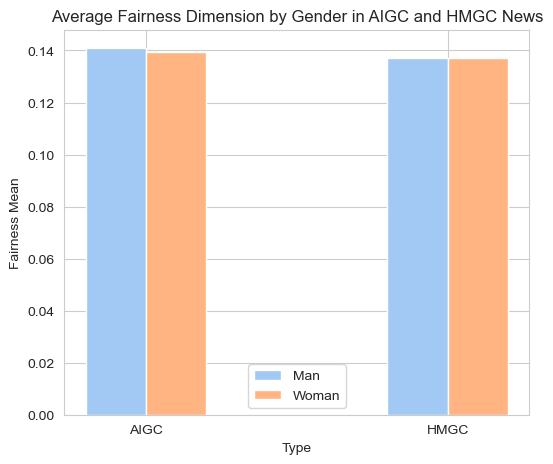

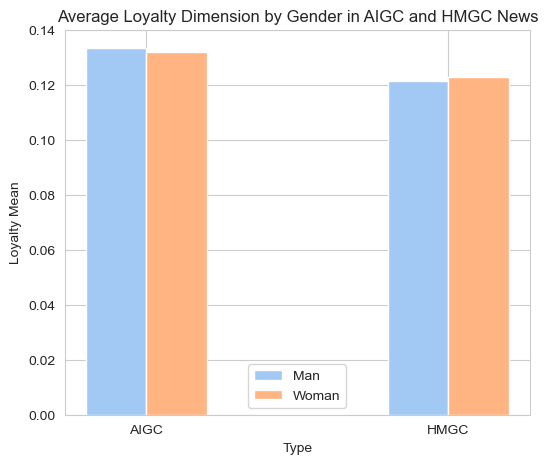

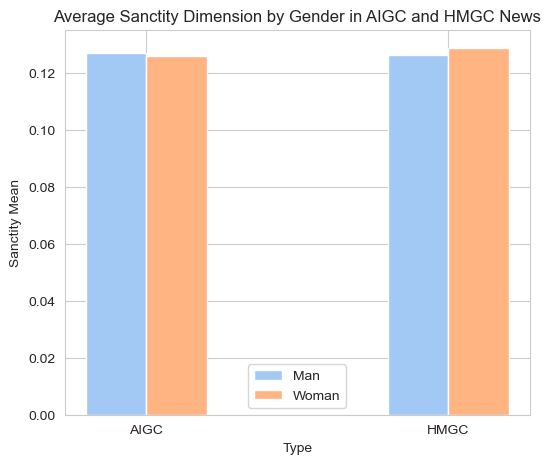

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn style and color palette
sns.set_style("whitegrid")  # Set background style to white grid
sns.set_palette("pastel")   # Set color palette to pastel colors

# Read two CSV files
aigc_news = pd.read_csv('AIGCnews_with_strength.csv')
hmgc_news = pd.read_csv('HMGCnews_with_strength.csv')

# Define the list of moral dimensions
moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']

# Iterate over each moral dimension to generate bar plots
for dimension in moral_dimensions:
    # Calculate the average value for each gender in the AIGC news for the current dimension
    aigc_gender_mean = aigc_news.groupby('Gender')[dimension].mean().reset_index()
    aigc_gender_mean.columns = ['Gender', 'Mean']
    aigc_gender_mean['Type'] = 'AIGC'  # Add a type marker

    # Calculate the average value for each gender in the HMGC news for the current dimension
    hmgc_gender_mean = hmgc_news.groupby('Gender')[dimension].mean().reset_index()
    hmgc_gender_mean.columns = ['Gender', 'Mean']
    hmgc_gender_mean['Type'] = 'HMGC'  # Add a type marker

    # Combine the datasets
    combined_data = pd.concat([aigc_gender_mean, hmgc_gender_mean])

    # Visualization: Draw a bar plot
    fig, ax = plt.subplots(figsize=(6, 5))  # Set the figure size, width 6, height 5

    # Set x-axis labels and bar positions
    x = np.arange(len(combined_data['Type'].unique()))
    bar_width = 0.2

    # Get average values for different genders
    male_means = combined_data[combined_data['Gender'] == 'Man']['Mean'].values
    female_means = combined_data[combined_data['Gender'] == 'Woman']['Mean'].values

    # Draw bar plot
    bar1 = ax.bar(x - bar_width/2, male_means, bar_width, label='Man')
    bar2 = ax.bar(x + bar_width/2, female_means, bar_width, label='Woman')

    # Add labels and title
    ax.set_xlabel('Type')
    ax.set_ylabel(f'{dimension.capitalize()} Mean')
    ax.set_title(f'Average {dimension.capitalize()} Dimension by Gender in AIGC and HMGC News')
    ax.set_xticks(x)
    ax.set_xticklabels(combined_data['Type'].unique())
    ax.legend()


In [86]:
import pandas as pd

# Read two CSV files
aigc_news = pd.read_csv('AIGCnews_with_strength.csv')
hmgc_news = pd.read_csv('HMGCnews_with_strength.csv')

# Define the list of moral dimensions
moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']

# Initialize an empty list to store results
results = []

# Iterate over each moral dimension to calculate averages and store in DataFrame
for dimension in moral_dimensions:
    # Calculate the average value for each gender in AIGC news for the current dimension
    aigc_gender_mean = aigc_news.groupby('Gender')[dimension].mean().reset_index()
    aigc_gender_mean['Type'] = 'AIGC'  # Add type marker
    aigc_gender_mean['Dimension'] = dimension  # Add moral dimension marker
    aigc_gender_mean.rename(columns={dimension: 'Mean'}, inplace=True)  # Rename column to 'Mean'
    
    # Calculate the average value for each gender in HMGC news for the current dimension
    hmgc_gender_mean = hmgc_news.groupby('Gender')[dimension].mean().reset_index()
    hmgc_gender_mean['Type'] = 'HMGC'  # Add type marker
    hmgc_gender_mean['Dimension'] = dimension  # Add moral dimension marker
    hmgc_gender_mean.rename(columns={dimension: 'Mean'}, inplace=True)  # Rename column to 'Mean'
    
    # Combine AIGC and HMGC results into a single DataFrame
    combined_data = pd.concat([aigc_gender_mean, hmgc_gender_mean])
    
    # Append current dimension data to results list
    results.append(combined_data)

# Concatenate all results into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

# Create a multi-level pivot table
pivot_table = results_df.pivot_table(index='Dimension', columns=['Type', 'Gender'], values='Mean')

# Style the pivot table to add borders
styled_table = pivot_table.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }]
).set_properties(**{'text-align': 'center'}).set_caption("Average Moral Scores by Gender in AIGC and HMGC News")

# Display the table with borders
styled_table


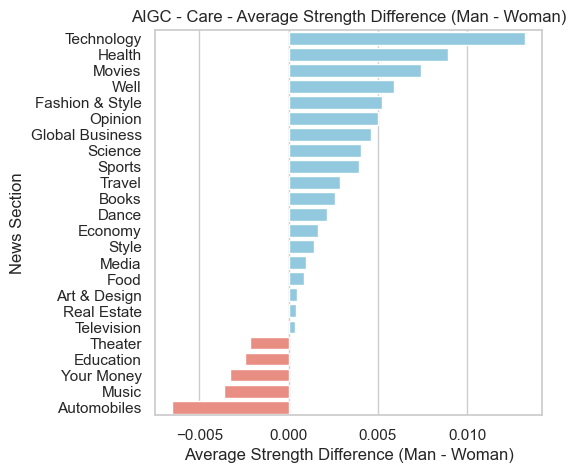

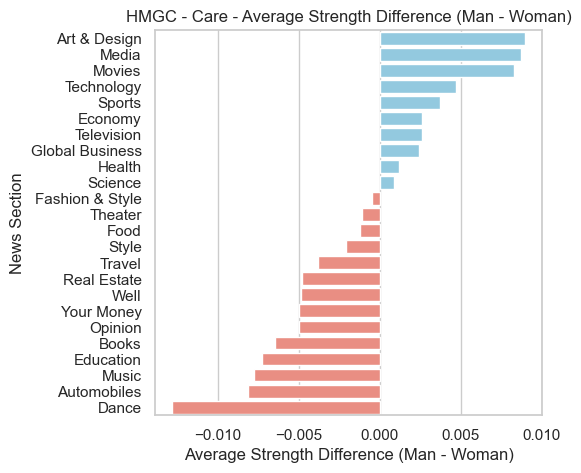

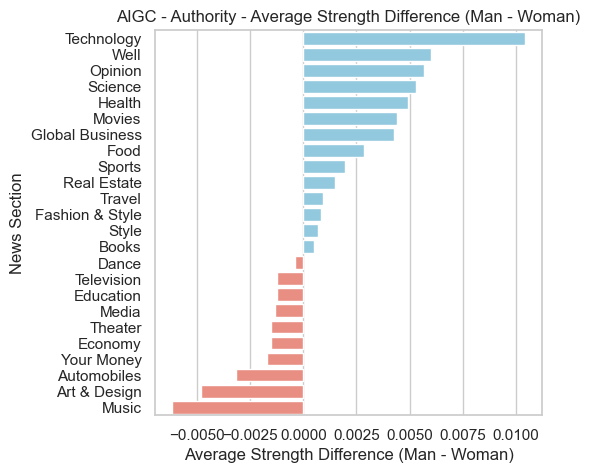

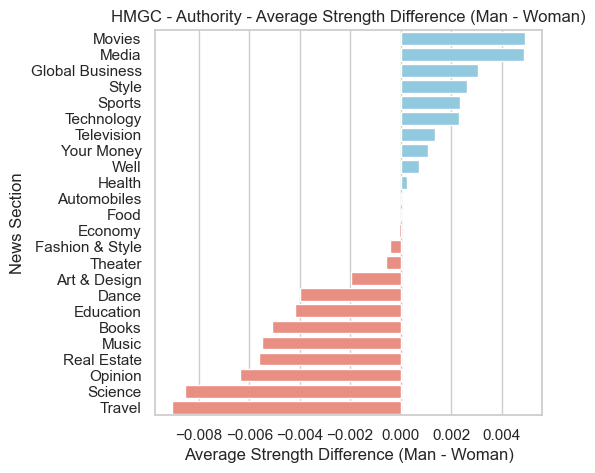

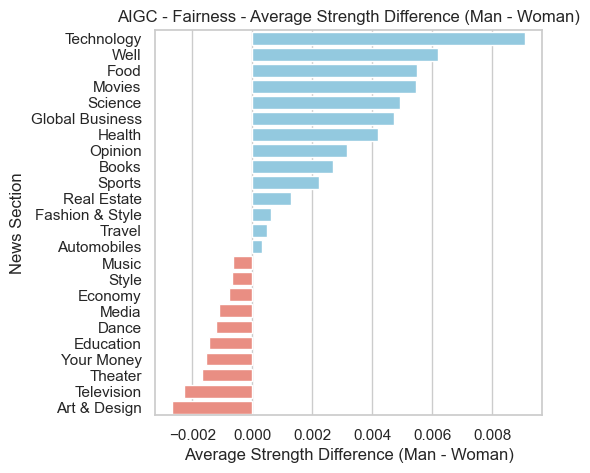

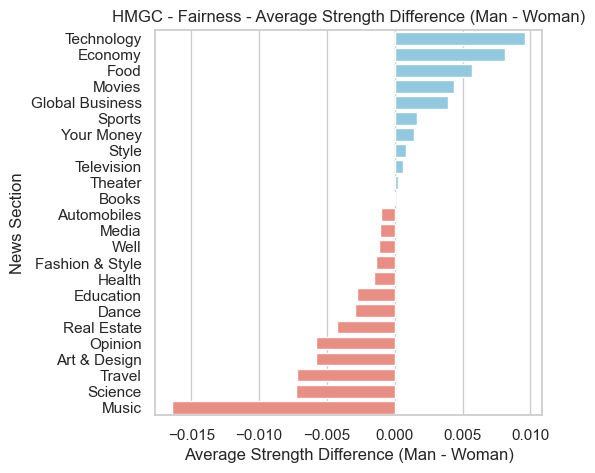

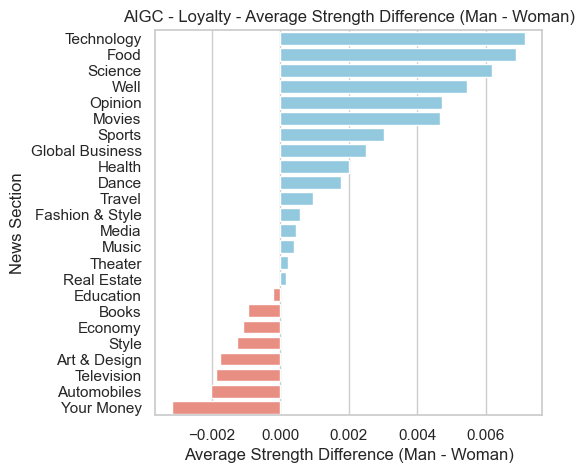

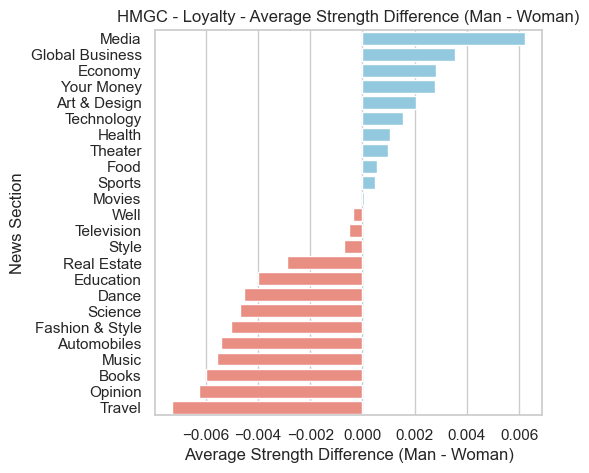

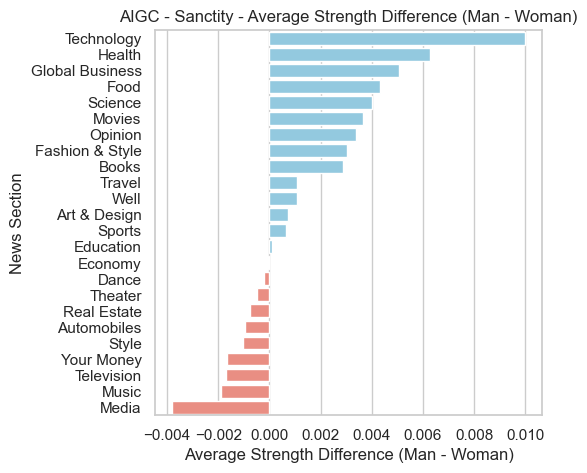

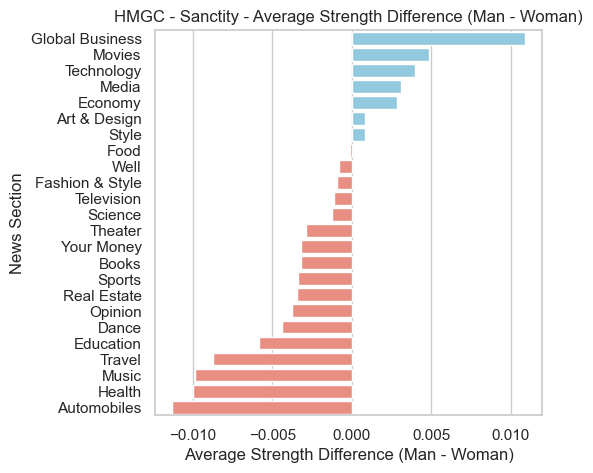

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Read two CSV files
aigc_news = pd.read_csv('AIGCnews_with_strength.csv')
hmgc_news = pd.read_csv('HMGCnews_with_strength.csv')

# Define the list of moral dimensions
moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']

# Iterate over each moral dimension to generate two bar plots
for dimension in moral_dimensions:
    # Calculate average values for each section by gender for AIGC news
    aigc_section_gender_mean = aigc_news.groupby(['section', 'Gender'])[dimension].mean().unstack()
    aigc_section_gender_mean['Difference'] = aigc_section_gender_mean['Man'] - aigc_section_gender_mean['Woman']

    # Sort sections by difference
    aigc_section_gender_mean = aigc_section_gender_mean.sort_values(by='Difference', ascending=False)

    # Calculate average values for each section by gender for HMGC news
    hmgc_section_gender_mean = hmgc_news.groupby(['section', 'Gender'])[dimension].mean().unstack()
    hmgc_section_gender_mean['Difference'] = hmgc_section_gender_mean['Man'] - hmgc_section_gender_mean['Woman']

    # Sort sections by difference
    hmgc_section_gender_mean = hmgc_section_gender_mean.sort_values(by='Difference', ascending=False)

    # Plot bar chart for AIGC news
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(
        y=aigc_section_gender_mean.index, 
        x=aigc_section_gender_mean['Difference'], 
        ax=ax, 
        palette=['salmon' if x < 0 else 'skyblue' for x in aigc_section_gender_mean['Difference']]
    )
    ax.set_title(f'AIGC - {dimension.capitalize()} - Average Strength Difference (Man - Woman)')
    ax.set_xlabel('Average Strength Difference (Man - Woman)')
    ax.set_ylabel('News Section')
    plt.show()

    # Plot bar chart for HMGC news
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(
        y=hmgc_section_gender_mean.index, 
        x=hmgc_section_gender_mean['Difference'], 
        ax=ax, 
        palette=['salmon' if x < 0 else 'skyblue' for x in hmgc_section_gender_mean['Difference']]
    )
    ax.set_title(f'HMGC - {dimension.capitalize()} - Average Strength Difference (Man - Woman)')
    ax.set_xlabel('Average Strength Difference (Man - Woman)')
    ax.set_ylabel('News Section')
    plt.show()


In [96]:
import pandas as pd
import numpy as np

# Read two CSV files
aigc_news = pd.read_csv('AIGCnews_with_strength.csv')
hmgc_news = pd.read_csv('HMGCnews_with_strength.csv')

# Define lists of moral dimensions and sections to analyze
moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']
sections_to_analyze = ["Sports", "Science", "Technology", "Economy", "Global Business", "Education", "Books", "Food"]

# Initialize results dictionary to store the slope (k) values
results = {section: {'Man': {}, 'Woman': {}} for section in sections_to_analyze}

# Iterate over each moral dimension
for dimension in moral_dimensions:
    for section in sections_to_analyze:
        # Calculate average values for men and women in the current section for AIGC news
        aigc_means = aigc_news[aigc_news['section'] == section].groupby('Gender')[dimension].mean()
        man_mean_aigc = aigc_means.get('Man', np.nan)
        woman_mean_aigc = aigc_means.get('Woman', np.nan)
        
        # Calculate average values for men and women in the current section for HMGC news
        hmgc_means = hmgc_news[hmgc_news['section'] == section].groupby('Gender')[dimension].mean()
        man_mean_hmgc = hmgc_means.get('Man', np.nan)
        woman_mean_hmgc = hmgc_means.get('Woman', np.nan)
        
        # Calculate slope (difference) between AIGC and HMGC news
        if not np.isnan(man_mean_aigc) and not np.isnan(man_mean_hmgc):
            k_man = man_mean_aigc - man_mean_hmgc
        else:
            k_man = np.nan
        
        if not np.isnan(woman_mean_aigc) and not np.isnan(woman_mean_hmgc):
            k_woman = woman_mean_aigc - woman_mean_hmgc
        else:
            k_woman = np.nan

        # Store results
        results[section]['Man'][dimension] = k_man
        results[section]['Woman'][dimension] = k_woman

# Create a DataFrame to display the results
results_df = pd.DataFrame(columns=['Section', 'Gender', *moral_dimensions])

for section, gender_data in results.items():
    for gender, dim_data in gender_data.items():
        row = {'Section': section, 'Gender': gender}
        row.update(dim_data)
        results_df = results_df.append(row, ignore_index=True)

# Print the results DataFrame
print(results_df)


            Section Gender      care  authority  fairness   loyalty  sanctity
0            Sports    Man -0.003495  -0.001488  0.000998  0.010473  0.002807
1            Sports  Woman -0.003725  -0.001117  0.000426  0.007921 -0.001196
2           Science    Man -0.009373   0.003718  0.006494  0.014912 -0.005911
3           Science  Woman -0.012538  -0.010157 -0.005706  0.004046 -0.011202
4        Technology    Man  0.004510   0.002088  0.006627  0.015130  0.005873
5        Technology  Woman -0.004004  -0.006032  0.007120  0.009542 -0.000161
6           Economy    Man  0.003340  -0.001276 -0.000228  0.007059  0.003487
7           Economy  Woman  0.004314   0.000222  0.008651  0.010960  0.006383
8   Global Business    Man  0.009246   0.003573  0.003621  0.011192  0.008078
9   Global Business  Woman  0.007094   0.002381  0.002856  0.012238  0.013872
10        Education    Man  0.001989  -0.000887  0.006807  0.012130  0.003200
11        Education  Woman -0.002824  -0.003825  0.005445  0.008

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


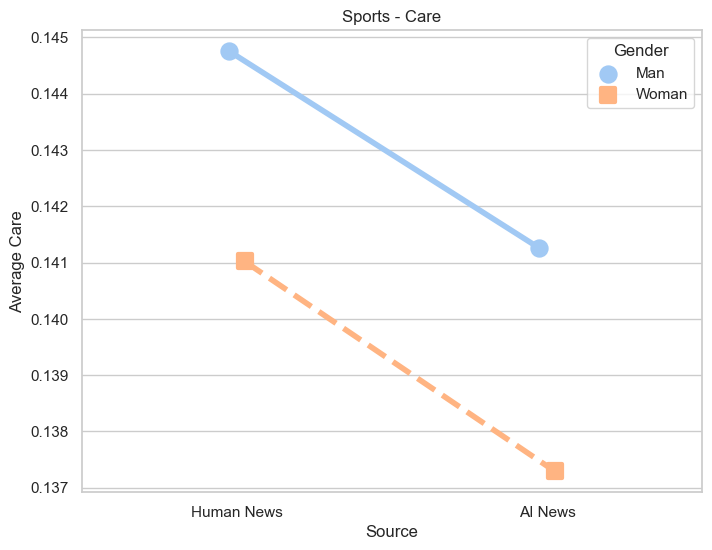

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


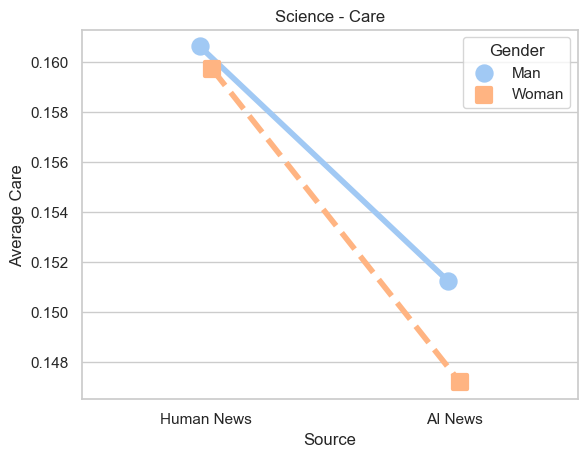

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


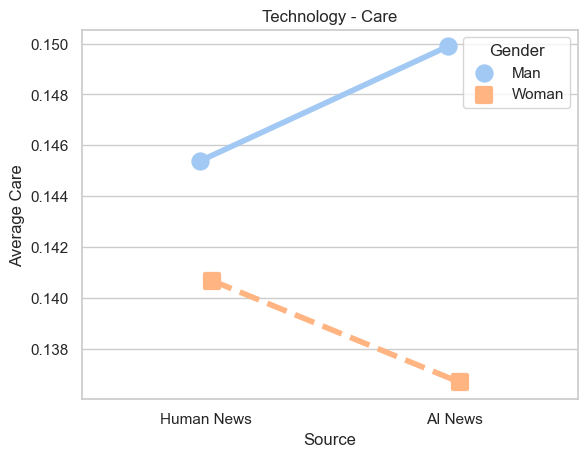

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


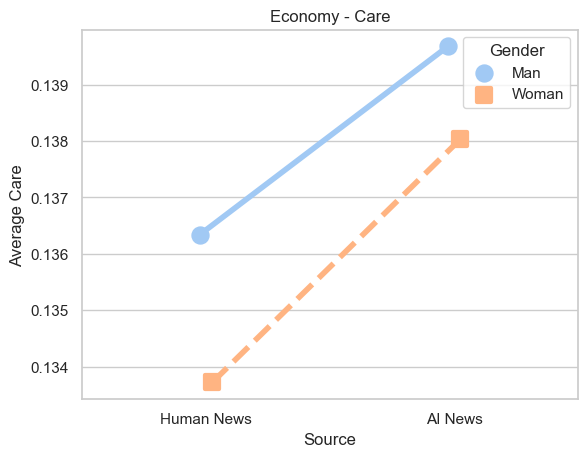

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


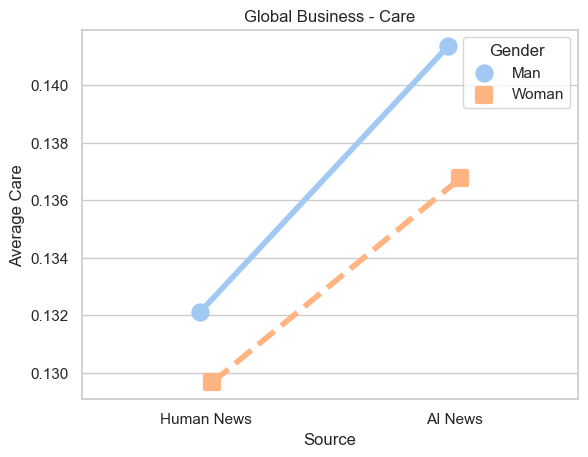

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


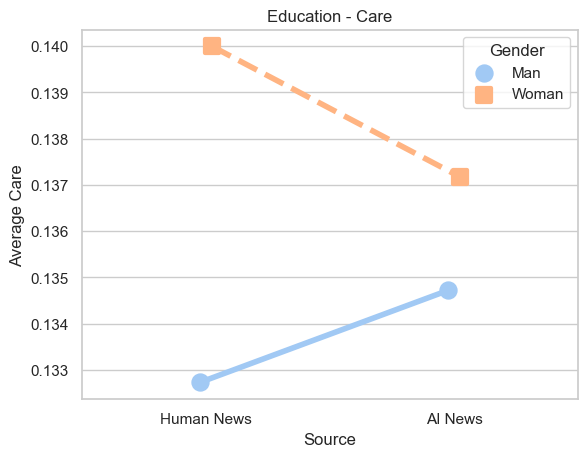

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


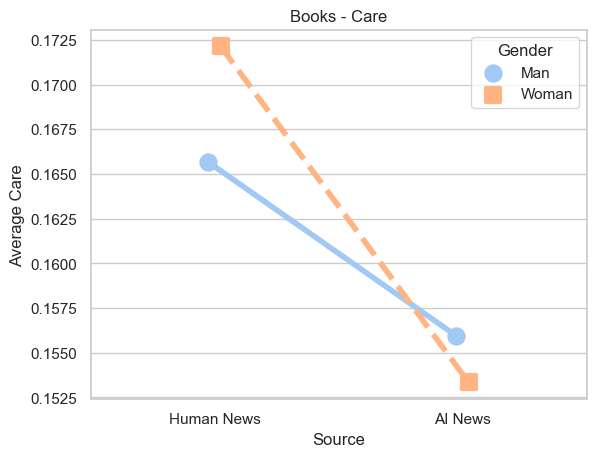

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


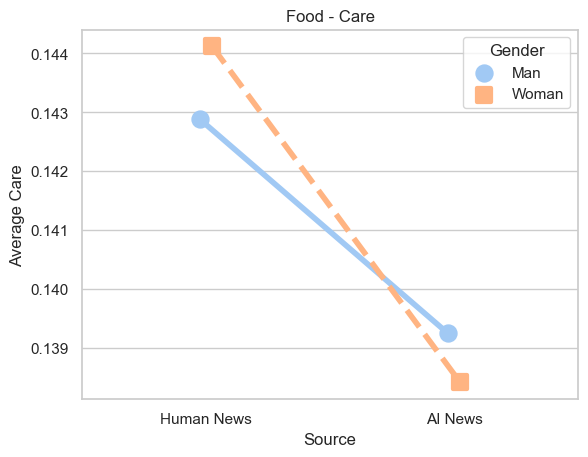

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


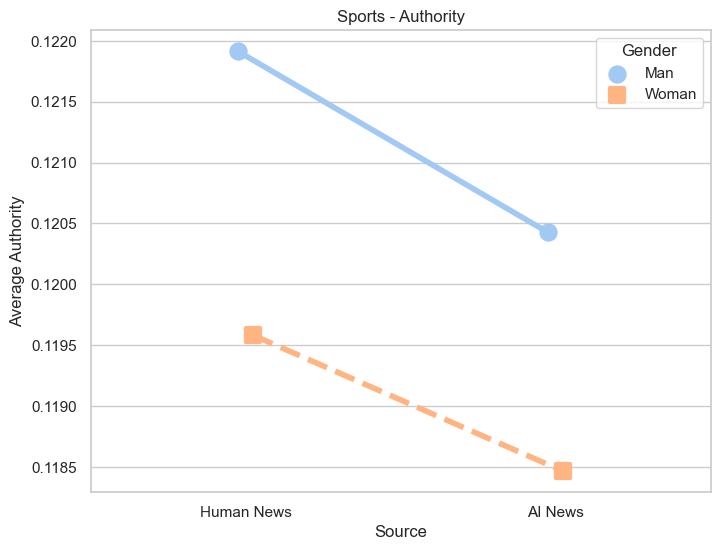

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


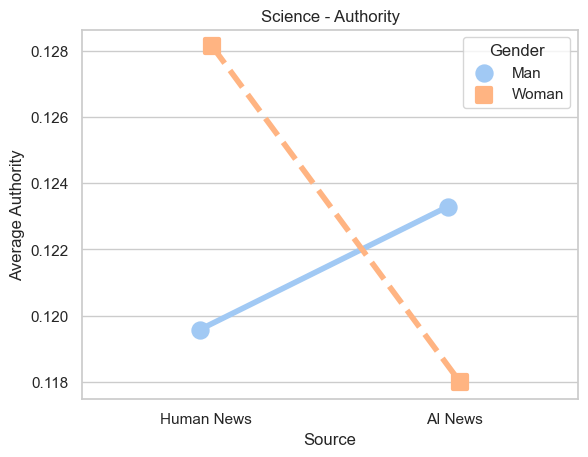

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


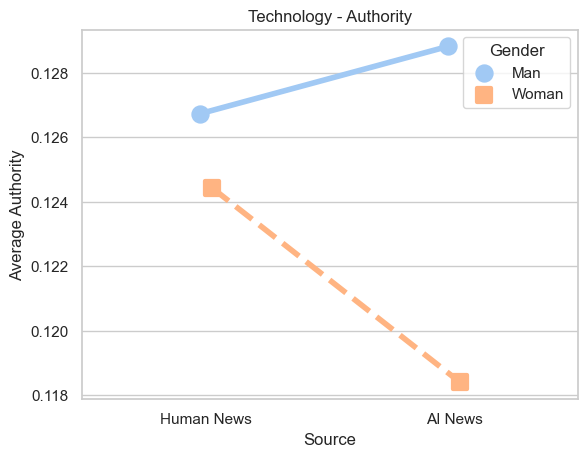

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


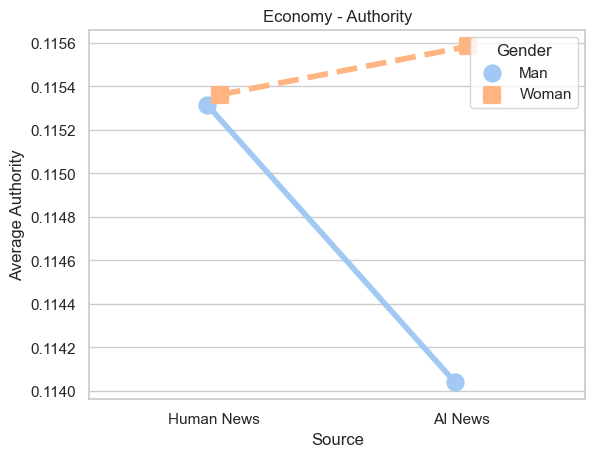

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


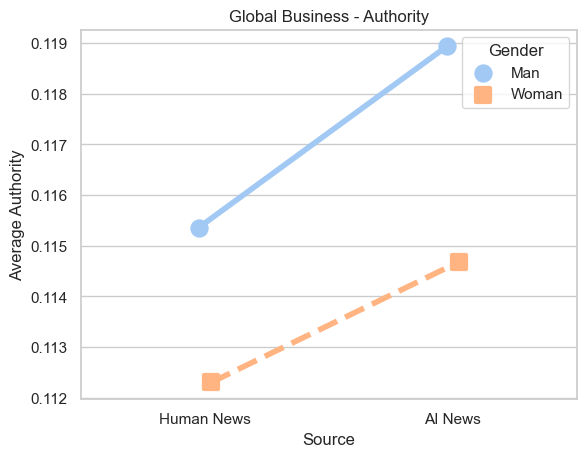

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


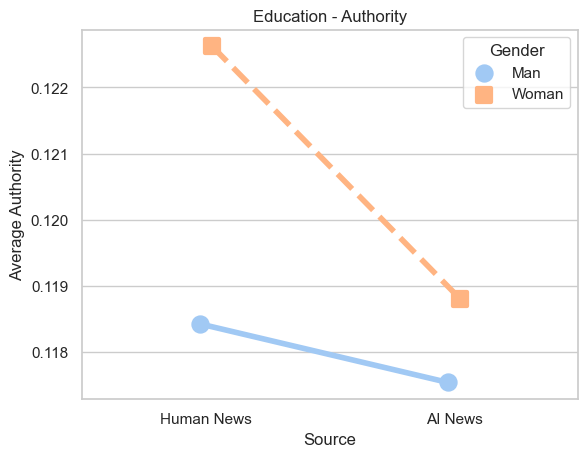

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


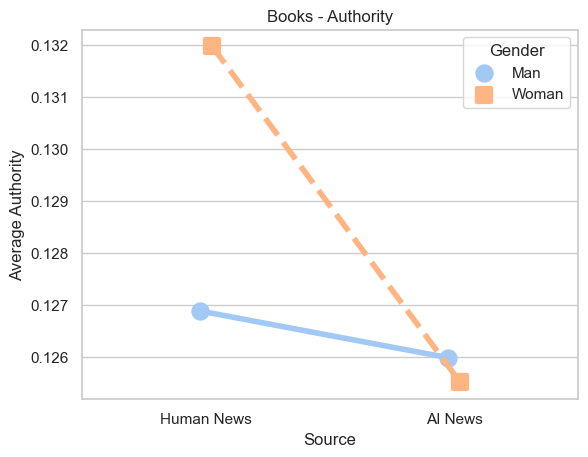

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


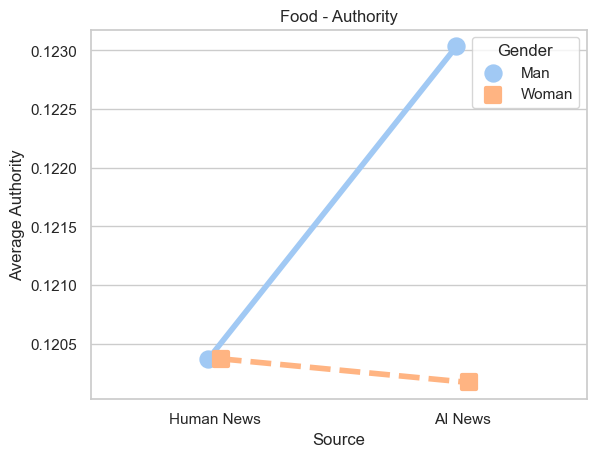

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


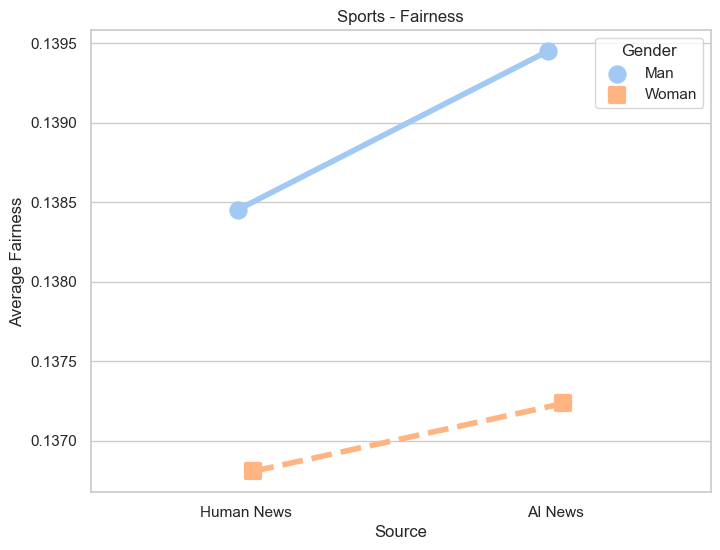

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


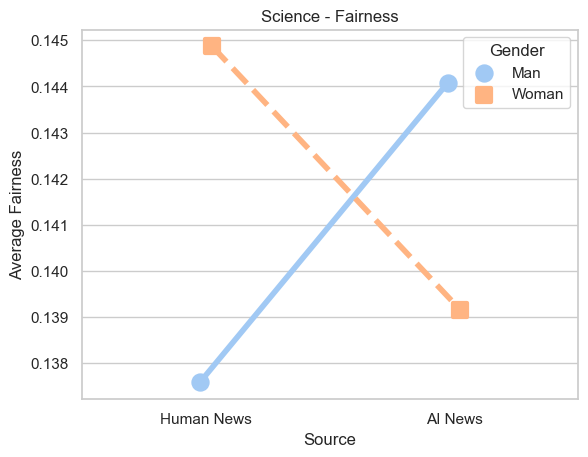

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


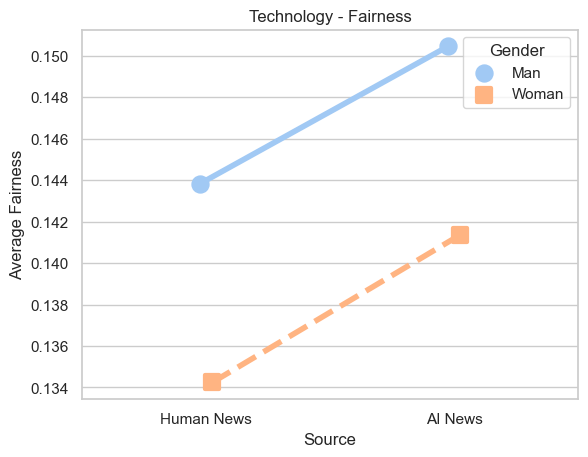

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


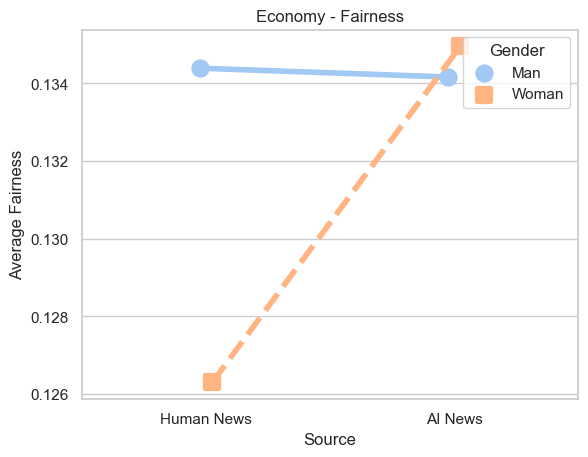

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


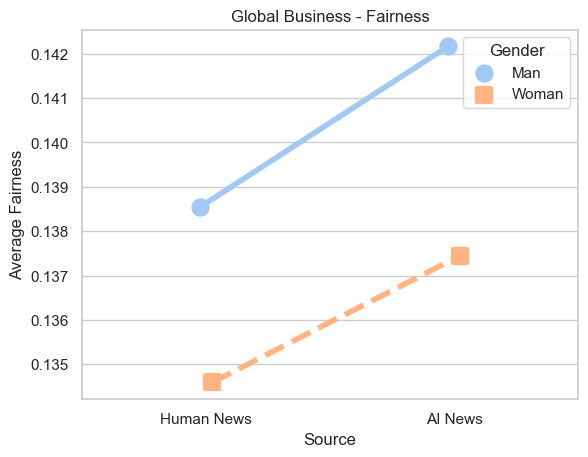

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


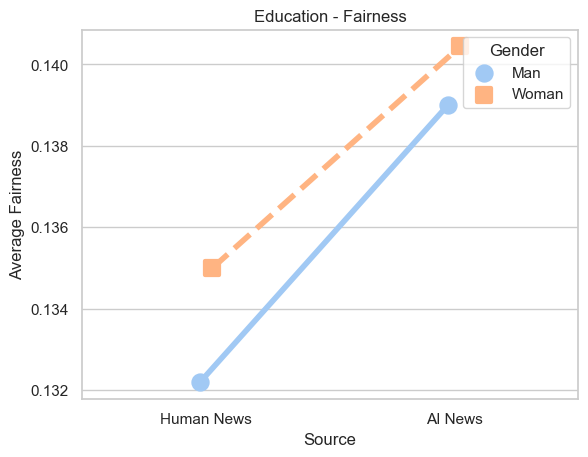

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


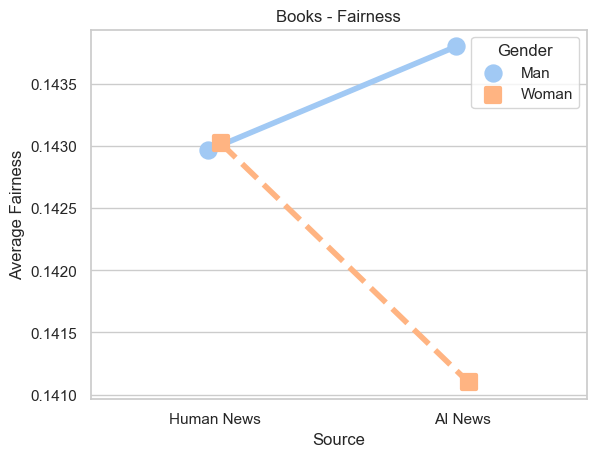

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


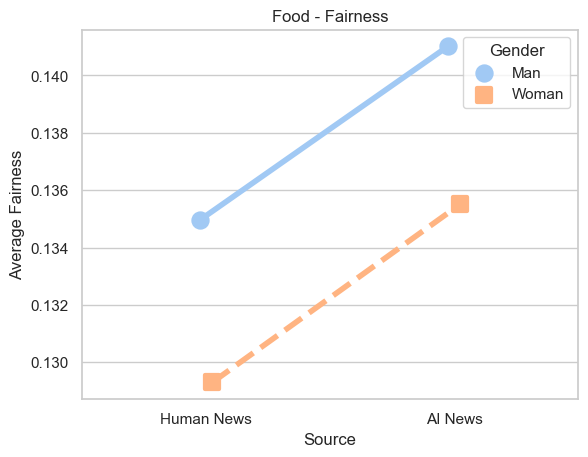

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


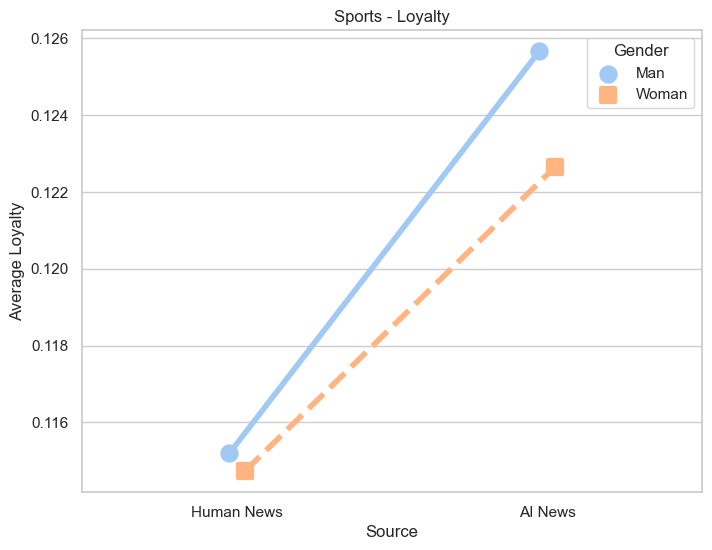

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


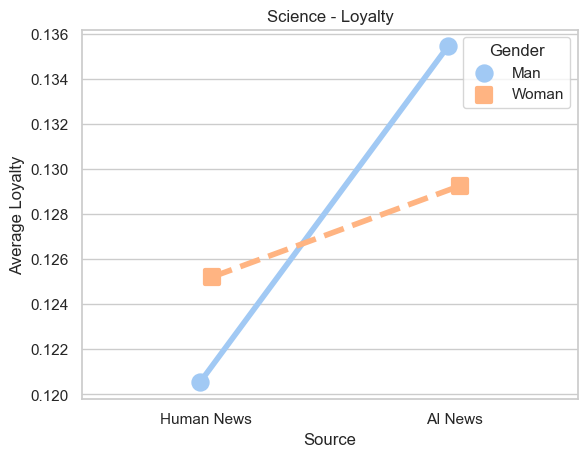

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


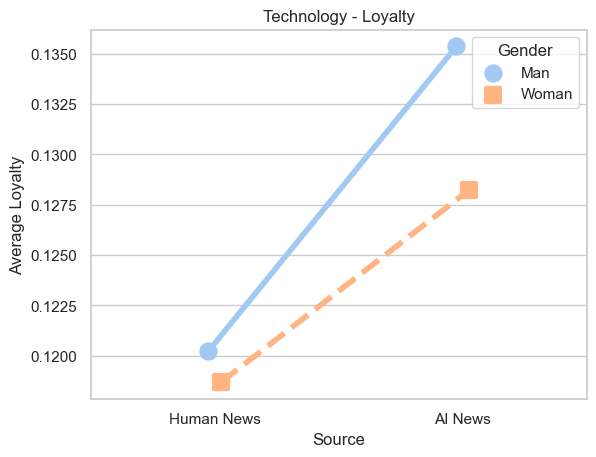

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


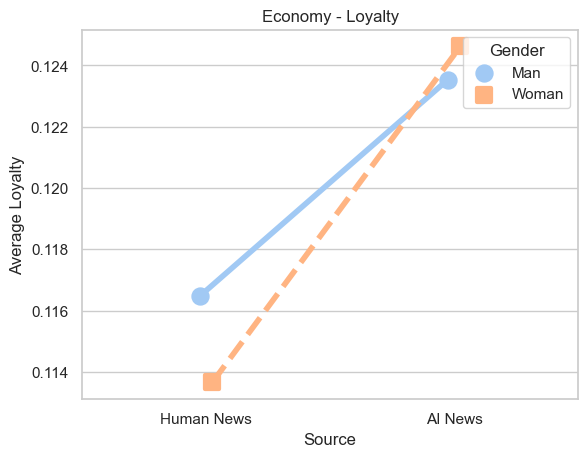

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


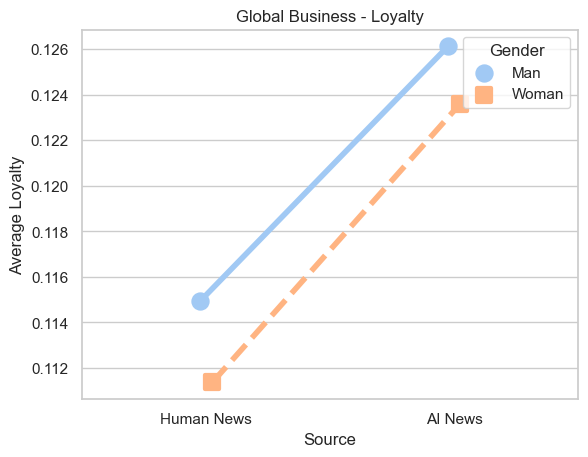

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


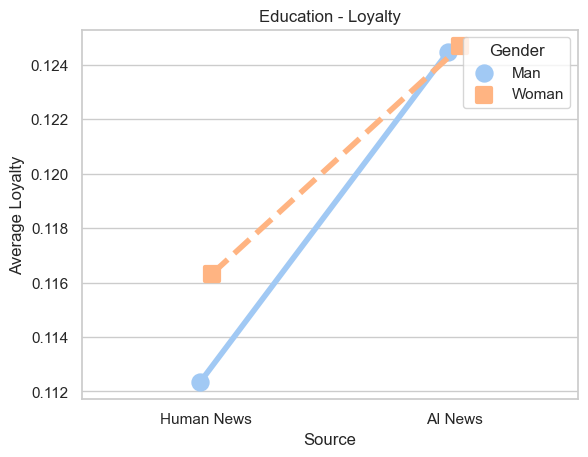

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


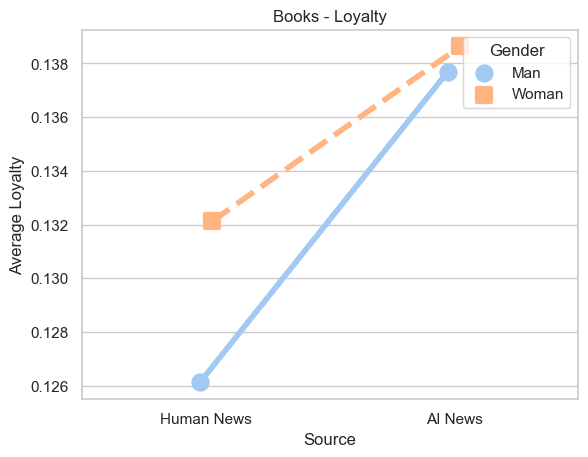

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


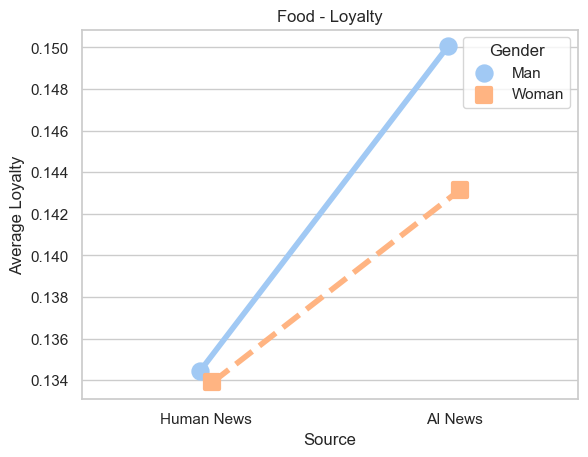

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


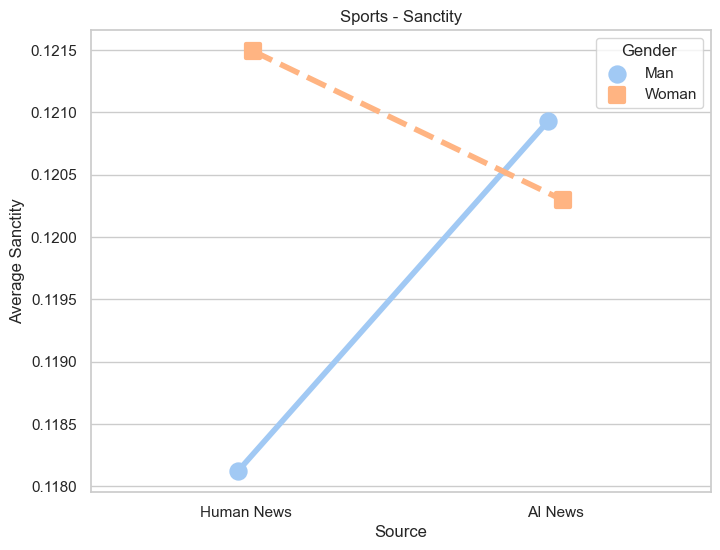

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


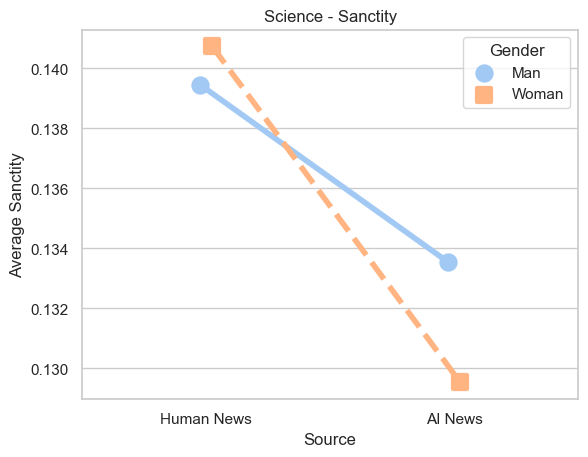

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


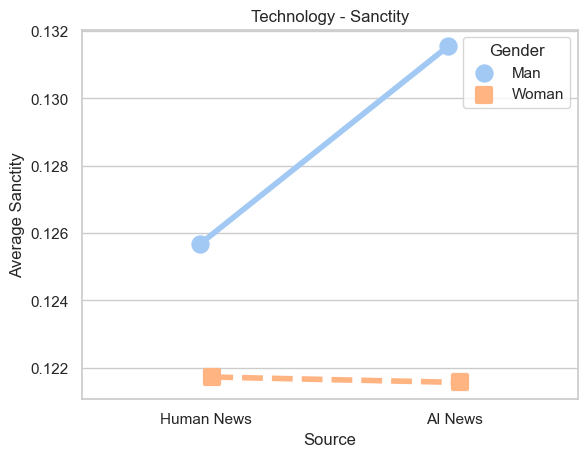

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


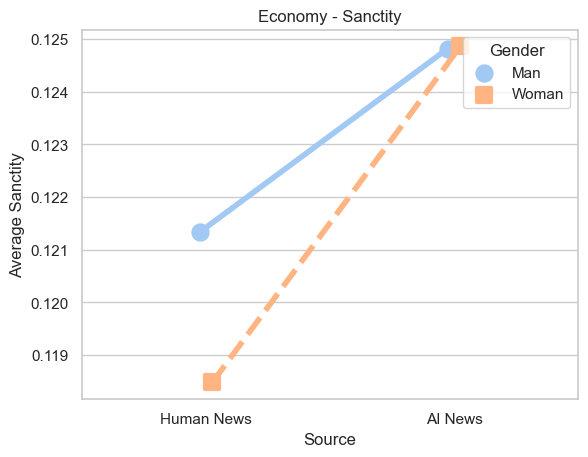

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


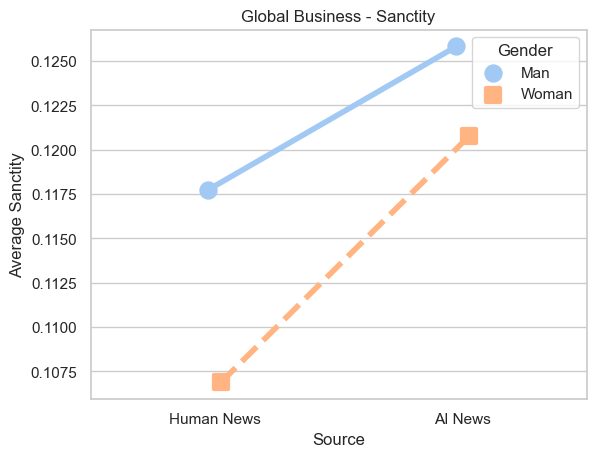

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


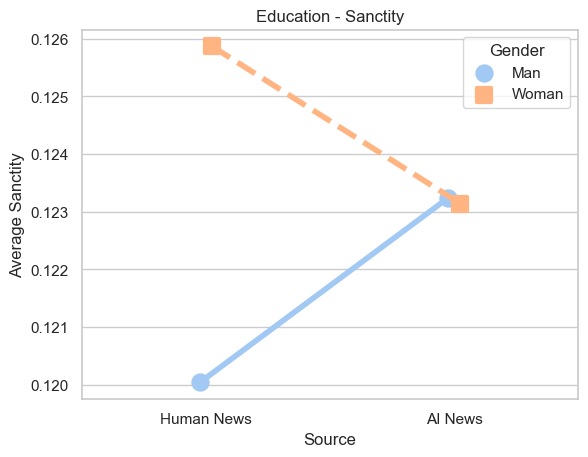

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


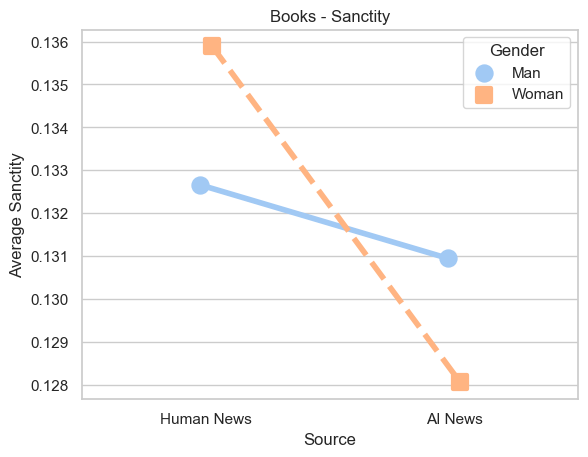

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_77555/1002547231.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)


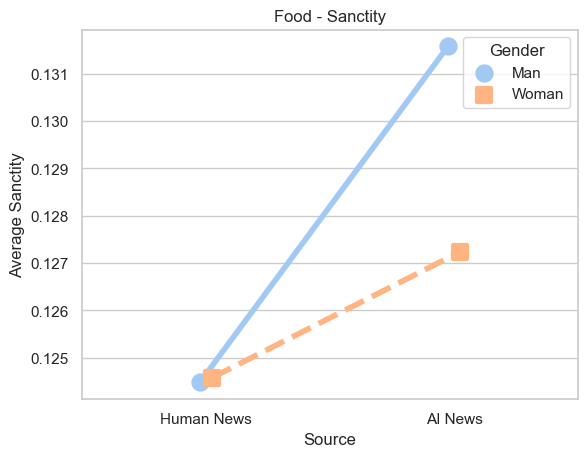

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read two CSV files
aigc_news = pd.read_csv('AIGCnews_with_strength.csv')
hmgc_news = pd.read_csv('HMGCnews_with_strength.csv')

# Define moral dimensions and sections to plot
moral_dimensions = ['care', 'authority', 'fairness', 'loyalty', 'sanctity']
sections_to_plot = ["Sports", "Science", "Technology", "Economy", "Global Business", "Education", "Books", "Food"]

# Set plot style
sns.set_style("whitegrid")

# Iterate over each moral dimension to generate line plots
for dimension in moral_dimensions:
    plt.figure(figsize=(8, 6))
    
    # Calculate average values for each moral dimension by gender and section for AIGC news
    mean_aigc = aigc_news.groupby(['section', 'Gender'])[dimension].mean().reset_index()
    mean_aigc['Source'] = 'AI News'
    
    # Calculate average values for each moral dimension by gender and section for HMGC news
    mean_hmgc = hmgc_news.groupby(['section', 'Gender'])[dimension].mean().reset_index()
    mean_hmgc['Source'] = 'Human News'
    
    # Combine AIGC and HMGC data
    combined_data = pd.concat([mean_aigc, mean_hmgc])

    # Plot for each section
    for section in sections_to_plot:
        subset = combined_data[combined_data['section'] == section]
        
        # Set the order of categories for plotting
        subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)
        
        # Create point plot with lines
        sns.pointplot(data=subset, x='Source', y=dimension, hue='Gender', palette="pastel", dodge=True, 
                      markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
        
        # Set plot title and labels
        plt.title(f'{section} - {dimension.capitalize()}')
        plt.xlabel('Source')
        plt.ylabel(f'Average {dimension.capitalize()}')

        # Show legend
        plt.legend(title='Gender')

        # Display plot
        plt.show()
